# Tsmoothie

## Basic Smoothing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import *

In [3]:
np.random.seed(33)
data = sim_randomwalk(n_series=10,timesteps=200,
                      process_noise=10,measure_noise=30)

Text(0.5, 0, 'time')

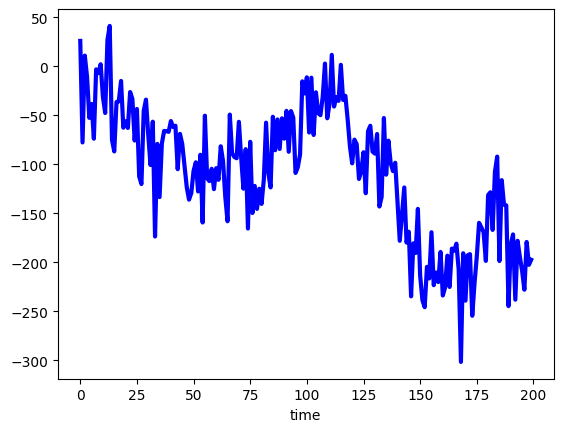

In [6]:
plt.plot(data[0], linewidth=3, color='blue')
plt.xlabel('time')

In [7]:
smoother = ExponentialSmoother(window_len=20,alpha=0.3)
smoother.smooth(data)

low, up = smoother.get_intervals('sigma_interval')

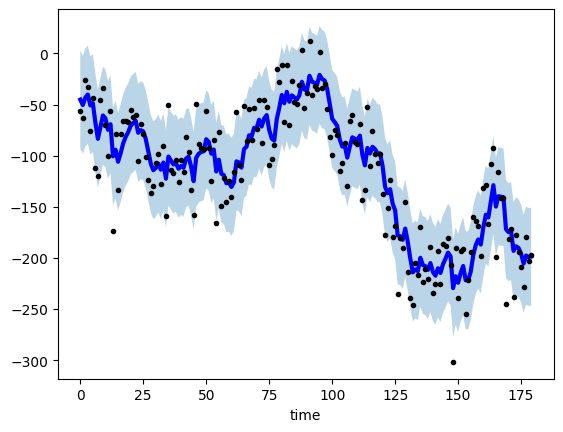

In [9]:
plt.plot(smoother.smooth_data[0],linewidth=3,color='blue')
plt.plot(smoother.data[0],'.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])),low[0],up[0],alpha=0.3)

In [10]:
#operate smoothing 
smoother = ConvolutionSmoother(window_len=20,window_type='ones')
smoother.smooth(data)

low, up = smoother.get_intervals('sigma_interval')

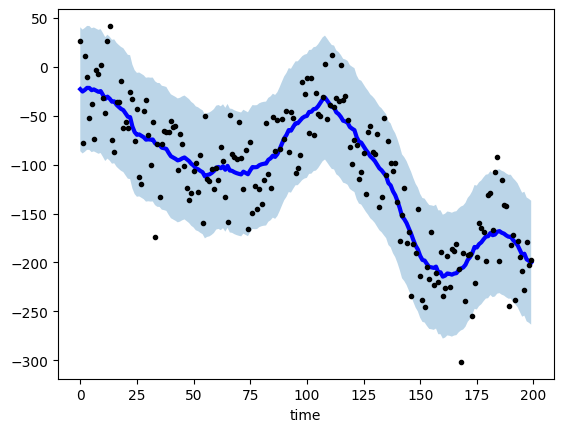

In [11]:
plt.plot(smoother.smooth_data[0],linewidth=3,color='blue')
plt.plot(smoother.data[0],'.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])),low[0],up[0],alpha=0.3)

In [12]:
smoother = SpectralSmoother(smooth_fraction=0.2, pad_len=20)
smoother.smooth(data)

low, up = smoother.get_intervals('sigma_interval')

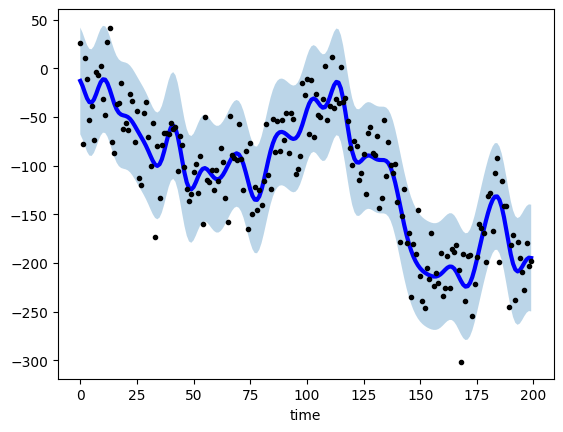

In [13]:
plt.plot(smoother.smooth_data[0],linewidth=3,color='blue')
plt.plot(smoother.data[0],'.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])),low[0],up[0],alpha=0.3)

In [14]:
smoother = PolynomialSmoother(degree=6)
smoother.smooth(data)

low, up = smoother.get_intervals('prediction_interval')

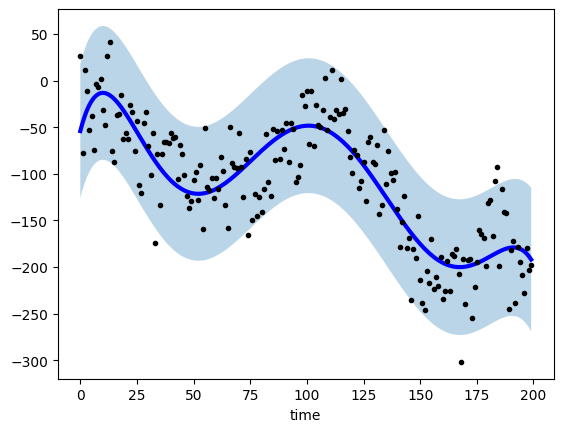

In [15]:
plt.plot(smoother.smooth_data[0],linewidth=3,color='blue')
plt.plot(smoother.data[0],'.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])),low[0],up[0],alpha=0.3)

In [16]:
smoother = SplineSmoother(n_knots=6, spline_type='natural_cubic_spline')
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

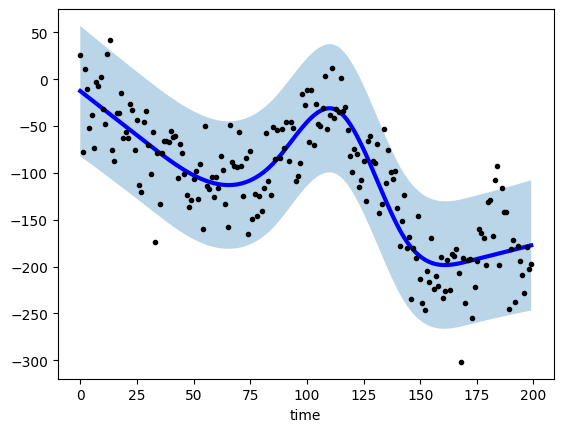

In [18]:
# plot the first smoothed timeseries with intervals
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [19]:
smoother = GaussianSmoother(n_knots=6, sigma=0.1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

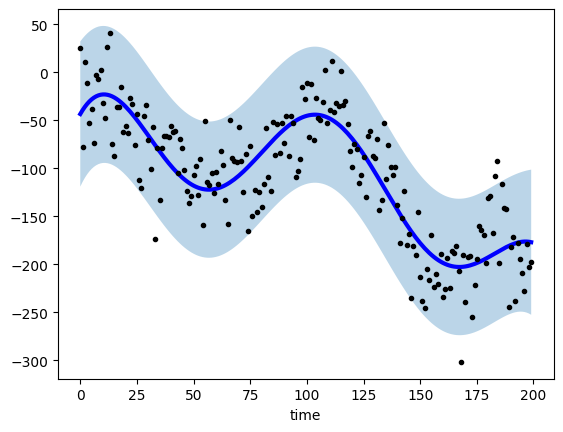

In [20]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [21]:
smoother = BinnerSmoother(n_knots=6)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

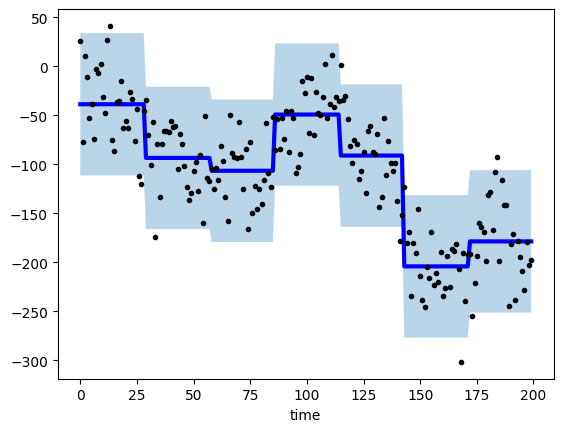

In [22]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [23]:
smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

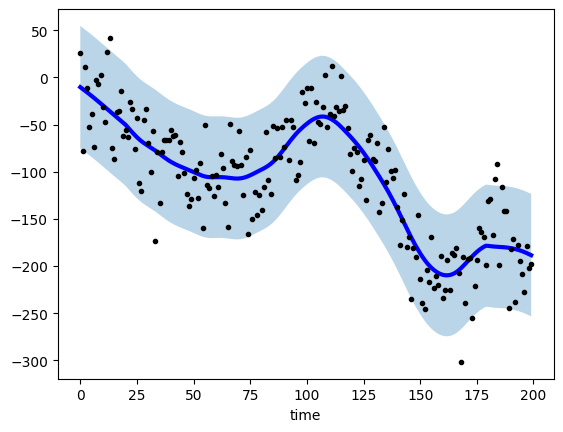

In [24]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [25]:
smoother = KalmanSmoother(component='level_trend', 
                          component_noise={'level':0.1, 'trend':0.1})
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('kalman_interval')

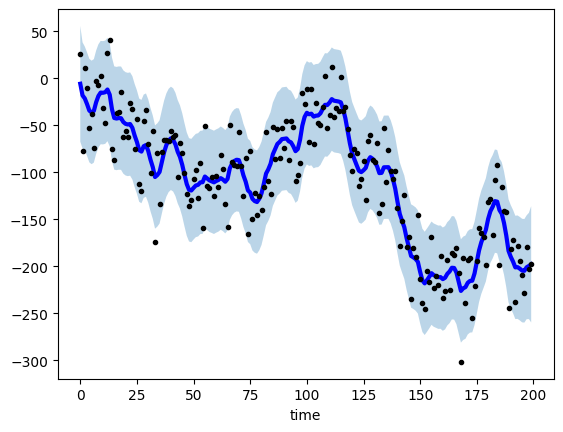

In [26]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

## Sinusoidal Smoothing

In [27]:
from tsmoothie.utils_func import sim_seasonal_data

In [28]:
np.random.seed(33)

data = sim_seasonal_data(n_series=10, timesteps=300, 
                         freq=24, measure_noise=30)

In [29]:
smoother = ExponentialSmoother(window_len=20, alpha=0.3)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('sigma_interval')

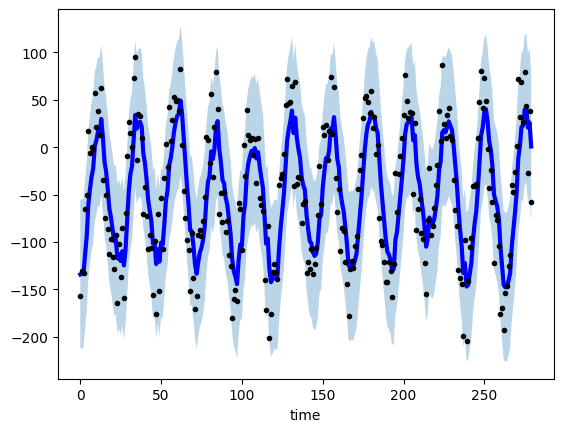

In [30]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [31]:
smoother = ConvolutionSmoother(window_len=10, window_type='ones')
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('sigma_interval')

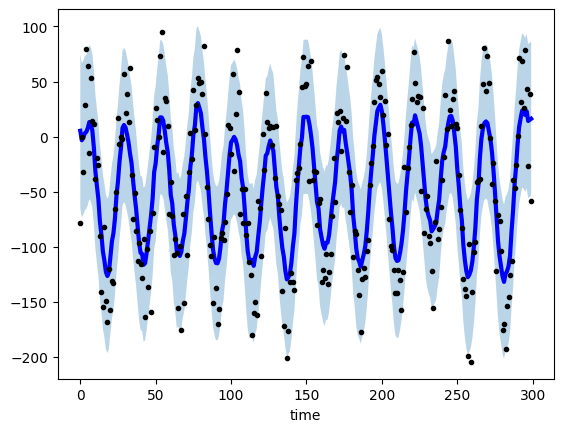

In [32]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [33]:
smoother = SpectralSmoother(smooth_fraction=0.2, pad_len=20)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('sigma_interval')

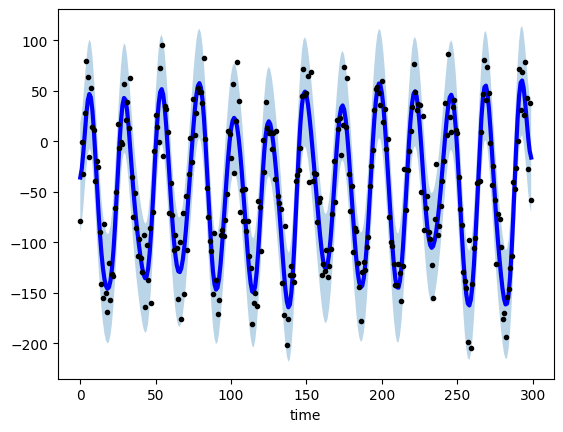

In [34]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [35]:
smoother = SplineSmoother(n_knots=30, spline_type='natural_cubic_spline')
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

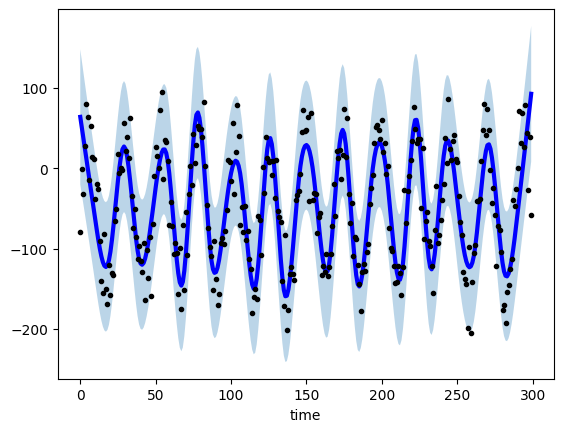

In [36]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [37]:
smoother = LowessSmoother(smooth_fraction=0.05, iterations=1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

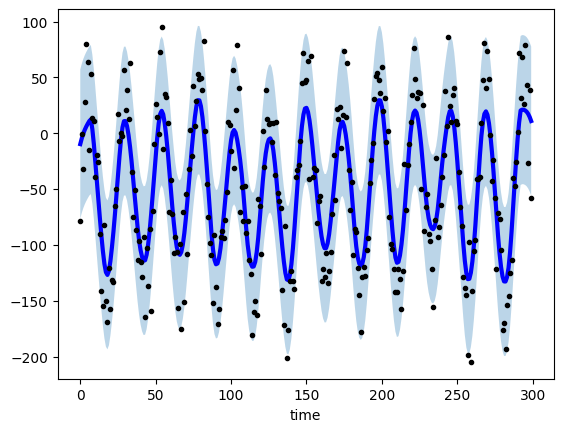

In [38]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [39]:
smoother = KalmanSmoother(component='level_season', 
                          component_noise={'level':0.1, 'season':0.1}, 
                          n_seasons=24)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('kalman_interval')

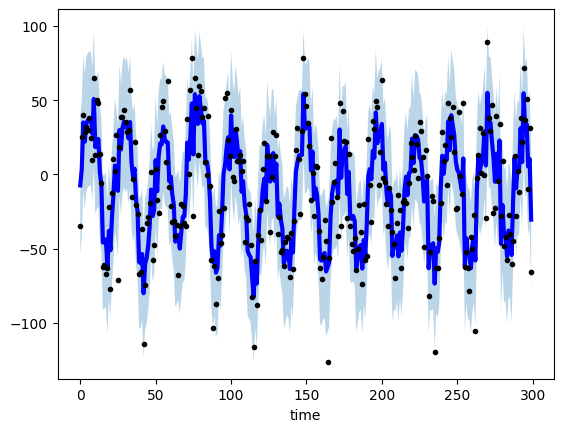

In [41]:
plt.plot(smoother.smooth_data[1], linewidth=3, color='blue')
plt.plot(smoother.data[1], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[1])), low[1], up[1], alpha=0.3)

In [42]:
smoother = DecomposeSmoother(smooth_type='convolution', periods=24,
                             window_len=30, window_type='ones')
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('sigma_interval')

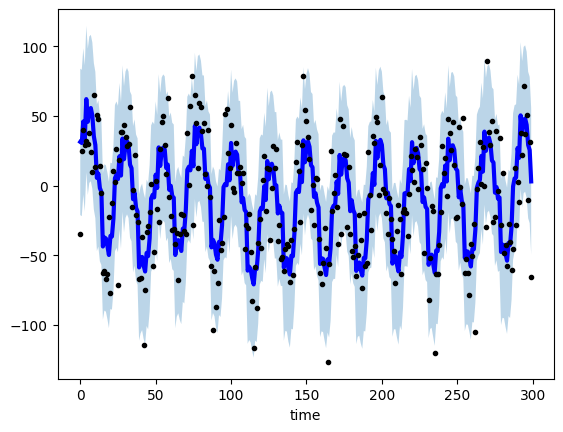

In [43]:
plt.plot(smoother.smooth_data[1], linewidth=3, color='blue')
plt.plot(smoother.data[1], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[1])), low[1], up[1], alpha=0.3)

### Multiple Seasonality

In [44]:
np.random.seed(33)

data1 = sim_seasonal_data(n_series=10, timesteps=300, 
                          level=0, amp=100, freq=24, measure_noise=30)

data2 = sim_seasonal_data(n_series=10, timesteps=300, 
                          level=0, amp=100, freq=24*7, measure_noise=50)

data = data1 + data2

In [45]:
smoother = ExponentialSmoother(window_len=20, alpha=0.3)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('sigma_interval')

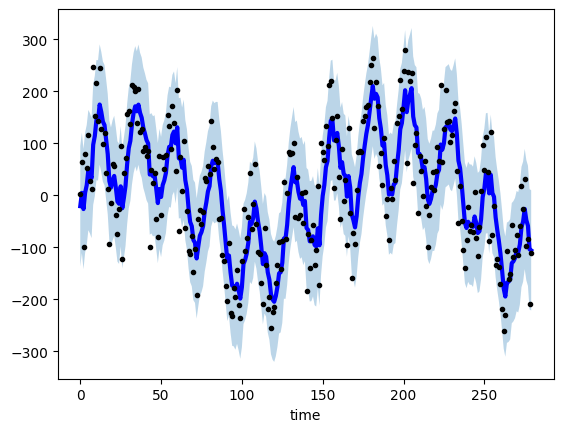

In [46]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [47]:
smoother = ConvolutionSmoother(window_len=10, window_type='ones')
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('sigma_interval')

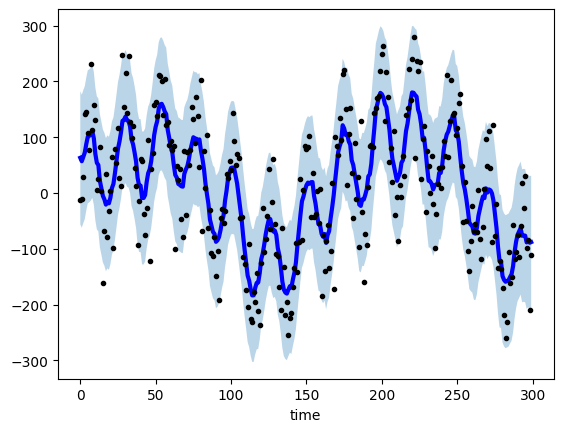

In [48]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [49]:
smoother = SpectralSmoother(smooth_fraction=0.2, pad_len=20)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('sigma_interval')

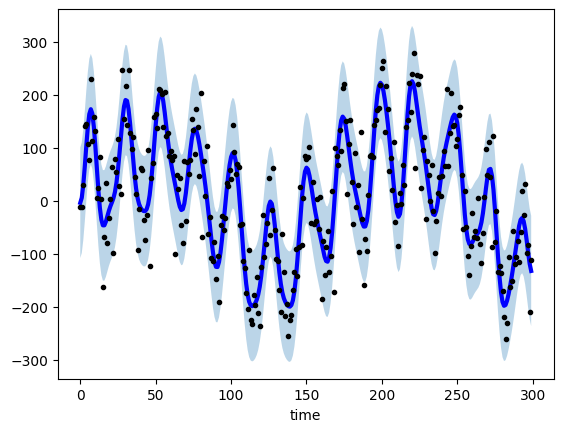

In [50]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

In [51]:
smoother = SplineSmoother(n_knots=30, spline_type='natural_cubic_spline')
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

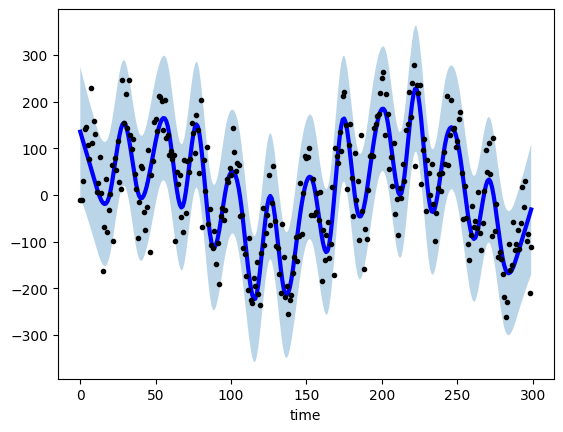

In [52]:
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.xlabel('time')

plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)